In [1]:
import tensorflow as tf

In [14]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [34]:
import seaborn as sns

In [35]:
iris = sns.load_dataset('iris')

In [36]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


---
# abstract
쉽게 사용 각각의 Algorithm 별 특색을 극대화 시킬 수 없음

In [ ]:
mlp = MLPClassifier((4,3,3))
mlp.fit()

In [ ]:
model = tf.keras.models.Sequential()
- MIMO (Multi Input Multi Output) (X)

In [ ]:
model = tf.keras.models.Model()
- MIMO (Multi Input Multi Output) (O)
- functional programming > theory == practice

In [75]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [76]:
# 28 by 28
X_train.shape

(60000, 28, 28)

In [78]:
X_train[0].shape

(28, 28)

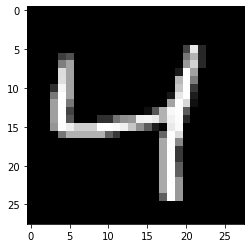

In [11]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2], cmap='gray')

In [79]:
# 28 by 28 을 reshape 해준다.(2차원을 1차원으로 바꾼다.)
# 왜?
# 뉴럴네트웤은 1차원 데이터를 받는다.

X_train_ = X_train.reshape(60000, -1)

In [80]:
X_train_.shape

(60000, 784)

---
# Sequentail 방식

In [27]:

model_ = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(784,)),
    tf.keras.layers.Dropout
    tf.keras.layers.Dense(10)
])

In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


멀티 인풋, 멀티 아웃풋이 가능하지 않음

In [37]:
issubclass(tf.keras.models.Sequential, tf.keras.models.Model)

# SISO 전용으로 만든 쉽게 사용할수 있게 만든 것

True

---
# Model 방식

In [13]:
input_ = tf.keras.Input(shape=(784,))

* 잠시  
-> 위 데이터를 sklearn 에 사용할 수 있는가?  
있다. (2차원의 numpy로 되어 있으니까.)

In [26]:
# layer1 = tf.keras.layers.Dense(128)
# layer1 는 함수처럼 사용 가능

x = tf.keras.layers.Dense(128)(input_)
output = tf.keras.layers.Dense(10)(x)
# 멀티 인풋, 멀티 아웃풋이 가능 (사이킷런은 가능)
model = tf.keras.models.Model(input_, output)

---

In [81]:
input_ = tf.keras.Input(shape=(784,))
x = tf.keras.layers.Dense(128)(input_)
# x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dense(10)(x)
output = tf.keras.layers.Dense(10)(x)
model = tf.keras.models.Model(input_, output)

In [82]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               100480    
_________________________________________________________________
re_lu_7 (ReLU)               (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
Total params: 101,880
Trainable params: 101,880
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 전문가 방식...
# super 무조건 써야함
# 왜 전문가는 이런 방식을 쓸까? 
# - model은 인풋을 지정해야하는데, 여기선 안해도 된다. (훨씬 더 유연함)
# - 상속을 하기 때문에 재활용 가능

class MyModel(tf.keras.models.Model):
    def __init__(self):
        super().__init__(self)
        self.layer1 = tf.keras.layers.Dense(128)
        self.relu1 = tf.keras.layers.ReLU()
        self.outlayer = tf.keras.layers.Dense(10)
        self.softmax = tf.keras.layers.Softmax()
    def call(self, input_):
        x = self.layer1(input_)
        x = self.relu1(x)
        x = self.outlayer(x)
        x = self.softmax(x)
        return x

In [44]:
mymlp = MyModel()

In [45]:
mymlp(input_)

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'my_model_2')>

In [46]:
mymlp.summary()

Model: "my_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             multiple                  100480    
_________________________________________________________________
re_lu_3 (ReLU)               multiple                  0         
_________________________________________________________________
dense_19 (Dense)             multiple                  1290      
_________________________________________________________________
softmax_1 (Softmax)          multiple                  0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
mlp = MLPClassifier()
mlp.fit(X_train_, Y_train)

MLPClassifier()

In [48]:
minput_ = tf.keras.Input(shape=(784,))
x = tf.keras.layers.Dense(128)(input_)
# x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dense(10)(x)
output = tf.keras.layers.Dense(10)(x)
model = tf.keras.models.Model(input_, output)

In [53]:
# 전부다 같은것, 하지만 첫번째를 많이 씀 (짧음)
X_train_[0][tf.newaxis].shape
X_train_[0].reshape(-1, 784).shape
tf.expand_dims(X_train_[0], 0).shape

TensorShape([1, 784])

In [55]:
model.weights

[<tf.Variable 'dense_23/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.02670462,  0.07212297,  0.07572461, ..., -0.03492951,
          0.00351293,  0.0227152 ],
        [-0.05606914, -0.01924315, -0.07365024, ..., -0.00696302,
          0.00960322,  0.06330822],
        [ 0.07419493, -0.05491085, -0.01561078, ...,  0.0226582 ,
         -0.02765274, -0.06502093],
        ...,
        [ 0.04898479, -0.06203903,  0.06071017, ...,  0.03194147,
          0.06598205, -0.0719903 ],
        [-0.07069965,  0.03458725,  0.05113774, ...,  0.05826724,
         -0.0280018 ,  0.01018471],
        [-0.00231661,  0.00238428,  0.01870421, ...,  0.00137569,
         -0.05755401, -0.04950357]], dtype=float32)>,
 <tf.Variable 'dense_23/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [56]:
import numpy as np

In [54]:
model(X_train_[0][tf.newaxis])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-127.88289  ,   18.20927  ,  -77.67089  ,   -1.0827913,
        -109.1558   ,  -75.66938  ,   33.706955 ,   61.257965 ,
         103.353165 , -135.28891  ]], dtype=float32)>

In [ ]:
# 위 값(예측 값)과  
# 0 0 0 0 0 0 1 0 0 0 0 (실제 값)  
# 차(실제값 - 예측값 = loss)를 구해서 가능한 비슷하게 웨이트를 조정한다 => 학습

---
### NN.pdf / 45p

optimization : 최적화 (최소값을 찾는 문제)  
loss : 실제값 - 예측값  

loss function : 실제값 - 예측값 (하나의 값들)  
cost function : 실제값들 - 예측값들 (여러 값들을 대표적인 하나의 값들로 만들때)  
 - 언제 제곱하고, 언제 절대값 쓰나? => 상황에 맞춰
 - MSE (제곱) [L2 loss] 
    - but outlier를 크게 부각시키는 문제점 (잘못된 값을 너무 크게 계산 할 수 있다.)
    - 해결 : cross entropy : 아닌건 0으로 맞는것만 계산.
    - onehot / 분류 에서는 MSE 보다 cross entropy 가 좋다.
 - MAE (절대값) [L1 loss]

objective function : 하나의 목적으로 보고 loss 계산

---

# complie

In [62]:

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy())

# 알아야 할 것이 3가지 있다.
# snake : sparse_categorical_crossentropy (function) : 언더바
# camel : sparseCategoricalCrossentropy (python에서는 camel 을 첫글자 대문자로)
# capsword(pascal) : SparseCategoricalCrossentropy
#
# 차이점 
#
# argument를 어떻게 사용하나가 다름
# tf.keras.losses.sparse_categorical_crossentropy
# => partial 함수를 사용해서 바꿔야 함
# tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# => 바로 바꿈

In [ ]:
# ex1)
l = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
dir(l)
# '__call__', 이 있으므로 함수 맞음

In [60]:
# ex2)
from functools import partial

s2 = partial(tf.keras.losses.sparse_categorical_crossentropy, from_logits = True)

In [61]:
# ex3) 데코레이션 (함수안에 함수)
def s3():
    def loss(y_true, y_pred):
        return tf.keras.losses.sparse_categorical_crossentropy(from_logits=True)
    return loss

In [ ]:
# 정리 (컴파일이 가능한 것들)
# https://keras.io/api/losses/
# loss 종류가 많다. 상황에 맞게 사용
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy()) # 괄호 (함수가 아님)
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy)
model.compile(loss="sparse_categorical_crossentropy") # 문자열 (문자열은 함수열)

In [ ]:
# loss 에서
# tf/keras > 이론관련 / 편의기능
tf.keras.losses.BinaryCrossentropy # 0 과 1

tf.keras.losses.CategoricalCrossentropy # 

tf.keras.losses.SparseCategoricalCrossentropy 
# 실제값이 onehot으로 표형해야 하는데, y_train이 onehot이 안되어 있을때 자동으로 인코딩 해줌 (편의기능)

---

# optimization (최적화) = 학습

방법에는 크게 -> 미분을 하는 것과 안하는 것으로 나뉨.

역전파 : 학습을 미분적으로 해결 => 시그모이드

미분을 한번하느냐, 두번하느냐

한번 미분해서 최소값을 구하는 방식 (여러번 미분하면 복잡해짐): 경사하상법 (gradient descent)   
- 꼭 경사하강 써야 하는건 아니다. 하지만.   
- 왜 사용? 빠르다. (리소스 값이 적게듦.)
- 경사하강을 여러번 반복 해 최소값 찾아야 함(epochs)

NN 에서 가장 잘 맞는 것 : 경사하강법으로 최소값을 찾는다.

---

In [83]:
# loss 와 optimizer 는 짝이 되어야 한다.
# metrics 까지 삼총사 (혼돈행렬 관점에서 (compusion metrics) 확인)
# 젤 중요한건 loss

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy']
              )

In [84]:
model.fit(X_train_, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 8.0914 - accuracy: 0.2152
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2547 - accuracy: 0.3009
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2643 - accuracy: 0.2932
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2643 - accuracy: 0.2932
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2501 - accuracy: 0.2942


In [89]:
X_train_.shape

(60000, 784)

In [ ]:
# 오버피팅 방지 = 테스트 데이터 해봐야 함 (reshape)

X_test_ = X_test.reshape(-1, 784)

---
역전파 (BackPropagation)

d
d

---
# flatten


In [91]:
# numpy flatten

x = np.arange(24).reshape(4,6)
x

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [92]:
x.flatten() # copy (deep copy) 깊은 복사

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [94]:
x.ravel() # view (shallow copy) 얕은 복사

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
# flatten 과 ravel 차이
# flatten 은 copy 방식, ravel 의 view 방식

---

In [95]:
# 3차원
x = np.arange(24).reshape(2,2,6)
x

array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]],

       [[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]])

In [96]:
x.shape

(2, 2, 6)

In [98]:
tf.keras.layers.Flatten()(x)

# (2,2,6) 중에서, 뒤에, 2,6 을 1차원으로 바꿔줌.

# 따라서, (60000, 28, 28) 이면 => (60000, 724) 로 바뀜.

# reshape 과 같은 개념 : X_train.reshape(60000, 28*28)

### 중요 ###
# reshape : cpu 연산
# flatten : cpu 연산

<tf.Tensor: shape=(2, 12), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])>

----
### 최종 코드

In [99]:
# https://www.tensorflow.org/tutorials/quickstart/beginner

import tensorflow as tf

In [100]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [101]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2909 - accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1375 - accuracy: 0.9593
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1046 - accuracy: 0.9687
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0709 - accuracy: 0.9779
313/313 - 0s - loss: 0.0744 - accuracy: 0.9773


[0.07437273114919662, 0.9772999882698059]

In [103]:
# mnist 손글씨의 문제점

# 크기가 거의 맞춰져 있다. 글씨가 중앙에 있다. 크기가 비슷하다.
# 따라서, 단순 array 형으로 모델을 돌려도 정확함.

# 글씨가 중앙에 어느정도 비슷한 크기로 있으면, 성능이 좋지만, 구석진데 글이 있으면 성능이 매우 떨어짐.
# 범용성 떨어짐

# 과거 => 데이터 전처리를 통해 정렬하고 => NN 통해 예측 (ML 방법)
# 또는 - 그림자체 특징을 잡아서 (사람이 만든 규칙) => 예측 (but 성능이 떨어지는 부작용, 고비용)

# 위 2개를 convolusion 을 통해, computer vision과 ML 기법이 합쳐져서 사용됨